# Import packages

In [450]:
# Import packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose

# Input data

[*********************100%%**********************]  1 of 1 completed


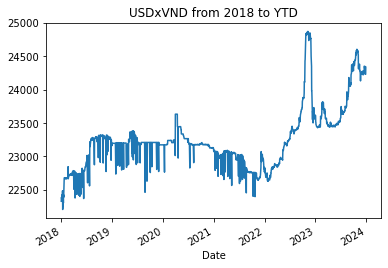

In [451]:
# Get data
data = yf.download('USDVND=X','2018-01-01','2024-01-01') # from 1 Jan 2021 to 31 December 2022

# Plot
data['Adj Close'].plot()
plt.title("USDxVND from 2018 to YTD")
plt.show()

# Exponential smoothing

In [452]:
# Formatting and splitting dataset into train data and test data
df = pd.DataFrame(data, columns=['Adj Close'])
df.index = pd.to_datetime(df.index)
df.index.freq = 'b'
x = round(len(df)/3)
df_train = df.iloc[:-x]
df_test = df.iloc[-x:]

ValueError: Inferred frequency None from passed values does not conform to passed frequency B

In [445]:
# Decompose
decompose_result = seasonal_decompose(df['Adj Close'], model = 'multiplicative')
decompose_result.plot();

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

#### Holt's Linear Smoothing
Use when there is trend in data, and no seasonality

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

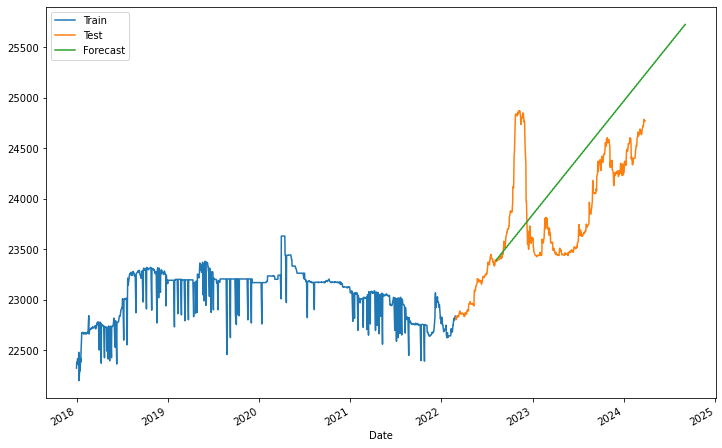

In [446]:
model = sm.tsa.ExponentialSmoothing(df_train['Adj Close'], trend='add', seasonal=None).fit().fittedvalues
pred = fitted.forecast(steps=x)

# Plot
df_train['Adj Close'].plot(legend=True, label='Train')
df_test['Adj Close'].plot(legend=True, label='Test', figsize = (12,8))
pred.plot(legend=True, label='Forecast')